##  The aim of this project is to predict rocktype (facies) in wells. For this project, the dataset utilised is the volve dataset.

#### 

In predicting the rock-types, we have 3 mineralogy data for 3 explorationary wells (wells 13-15): Quartz, Shales and Carbonate, i.e rocktypes 1-3. In the wells with no known facies classification (wells 1-12), the empty cells were replaced with 4 to prevent errors asssociated with dealing with N/A values

The Facies are going to be predicted based on 3 well logs used for supervised learning: NPHI, GR and RHOB

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set() 
import pandas as pd
import sklearn
import warnings

warnings.filterwarnings("ignore")

# read the dataset into a pandas dataframe

dataframe = pd.read_csv("Wells.csv")
dataframe.head()

#new_data contains only wells 1-12 without co
new_data = dataframe[dataframe['Well']<13]

# extracting the core data needed for K-means
# iloc is used for slicing in a pandas dataframe, and referencing the columns index. .loc is used to refer to the names of the colummns 

coreData_new = dataframe[dataframe['Well']>12]
coreData = coreData_new.iloc[:, [19, 20, 21]]

# drop all n/a values

coreData = coreData.dropna()

coreData.head()
                

,Vquartz,Vsh,Vcarb
51877,0.0,0.118,0.857
51878,0.0,0.120,0.854
51879,0.0,0.115,0.869
51880,0.0,0.217,0.769
51881,0.0,0.291,0.687


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
coreData_scaled = scaler.fit_transform(coreData)

In [3]:
#Determining the ooptimum number of clusters for k-means classification

SSW = np.zeros(10) # Initialize the list SSW to be empty
for k in range(1,10):
    kmeans_for_Core = KMeans(n_clusters=k, random_state=42).fit(coreData_scaled)
    SSW[k] = kmeans_for_Core.inertia_


print('The SSW values are', SSW[1:10])


The SSW values are [1517.22438314  658.67485462  192.08528671  108.96189176   63.1389325
   49.17238841   37.14642669   31.31416971   25.83757151]


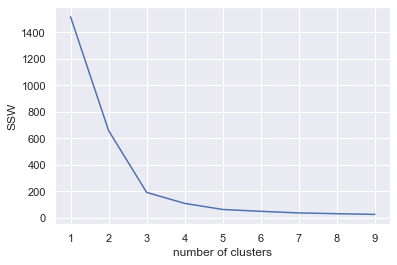

In [4]:
clusters = range(1, 10)
plt.ylabel('SSW')
plt.xlabel('number of clusters')
plt.plot(clusters, SSW[1:10])
#from this, see the inflection point at 3 so this is optimum number of clusters

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 50, max_iter = 300)
kmeans.fit(coreData_scaled)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
coreFacies = kmeans.predict(coreData_scaled)

[0 0 0 ... 0 0 0]
[[-6.60582700e-15  1.51709415e-01  7.86545431e-01]
 [ 6.87593989e-01  1.35103105e-01  3.94129174e-15]
 [ 1.09841789e-01  8.23428036e-01  3.81061345e-02]]


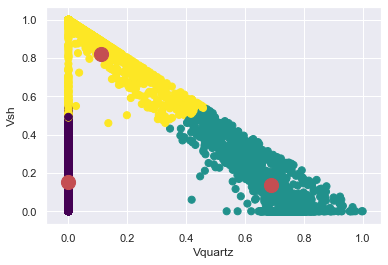

In [6]:
plt.scatter(coreData_scaled[:, 0], coreData_scaled[:, 1], c=coreFacies, s=50, cmap='viridis')
plt.xlabel('Vquartz')
plt.ylabel('Vsh')

#centers = Core_unscaled_kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', s=200);

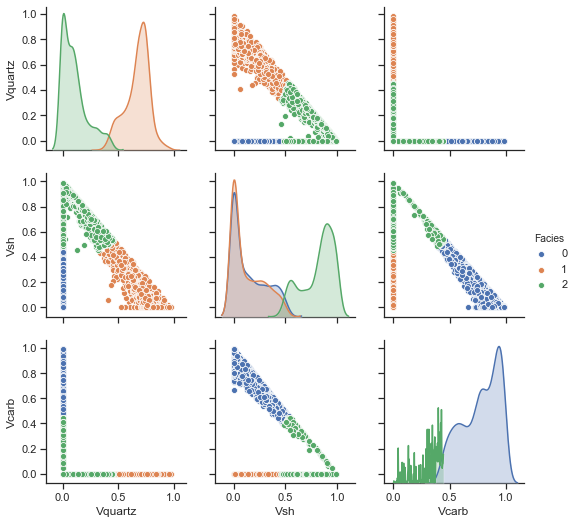

In [7]:
coreData['Facies'] = coreFacies
sns.set(style = 'ticks')
sns.pairplot(coreData, vars=['Vquartz','Vsh','Vcarb'], hue = 'Facies')

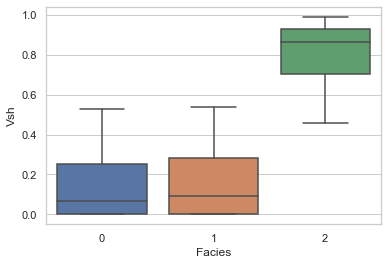

In [8]:
sns.set(style="whitegrid")
sns.boxplot(x=coreData['Facies'], y=coreData['Vsh'])

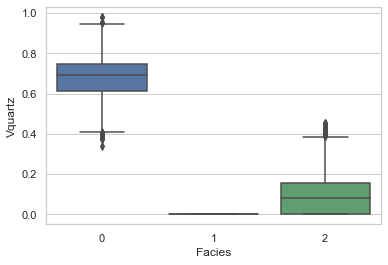

In [9]:
sns.set(style="whitegrid")
sns.boxplot(x=coreData['Facies'], y=coreData['Vquartz'])

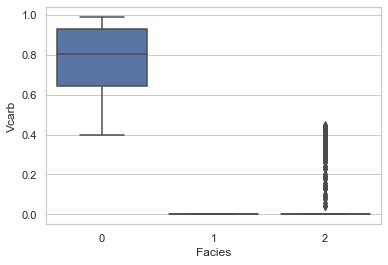

In [91]:
sns.set(style="whitegrid")
sns.boxplot(x=coreData['Facies'], y=coreData['Vcarb'])

Trying Hierarchichal clustering

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [11]:
# First define the model
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

# Apply the model to the data and predict the clusters
y_hc = hc.fit_predict(coreData_scaled)
print(y_hc)

[0 0 0 ... 0 0 0]


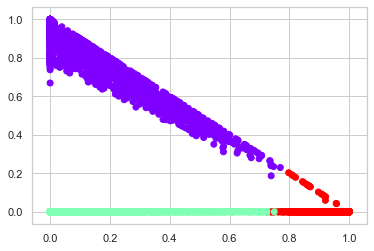

In [12]:
plt.scatter(coreData_scaled[:,1],coreData_scaled[:,2], c=hc.labels_, cmap='rainbow') 

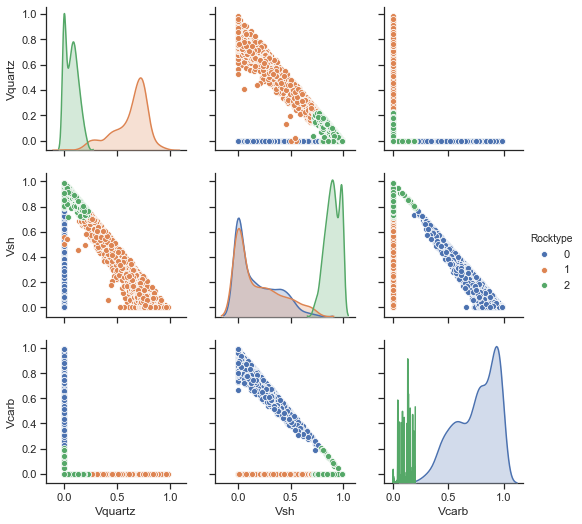

In [13]:
coreData['Rocktype'] = hc.labels_

sns.set(style = 'ticks') # Set the background to dark

sns.pairplot(coreData, vars = ['Vquartz','Vsh','Vcarb'], hue = "Rocktype") # Create a matrix scatterplot


Comparing K-means with Hierachical clustering yields similar results, hence I stick with results from k-means

In [8]:
coreData_new['Facies']=coreFacies

coreData_new.head(200)

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
51877,13,4175.5,20.6032,NaN,NaN,65.7517,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.1812,2.6117,0.0770,0.000,0.118,0.857,0
51878,13,4176.0,21.4990,NaN,NaN,64.6838,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.5516,2.6131,0.0798,0.000,0.120,0.854,0
51879,13,4176.5,22.4472,NaN,NaN,66.1114,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.4804,2.6334,0.0801,0.000,0.115,0.869,0
51880,13,4177.0,29.6713,NaN,NaN,67.5655,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.3859,2.6328,0.1005,0.000,0.217,0.769,0
51881,13,4177.5,34.7014,NaN,NaN,67.2342,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.8566,2.6183,0.1001,0.000,0.291,0.687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52072,13,4273.0,54.3676,NaN,NaN,74.6880,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.9854,2.5587,0.1528,0.000,0.502,0.433,0
52073,13,4273.5,57.0375,NaN,NaN,76.8682,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.9387,2.5529,0.1468,0.000,0.549,0.379,2
52074,13,4274.0,67.8972,NaN,NaN,78.5910,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.8154,2.5623,0.1626,0.308,0.621,0.000,2
52075,13,4274.5,61.6608,NaN,NaN,77.5849,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.7727,2.5569,0.1843,0.367,0.563,0.000,2


In [9]:
new_data

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,DownP,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb
0,1,2922.5,13.4058,8.7053,NaN,77.1874,4.5008,4.3012,71.0000,23.583,...,382.2000,2200.9165,1.4182,8.5,1.6100,2.4838,0.1439,NaN,NaN,NaN
1,1,2923.0,15.2468,6.4380,NaN,75.5047,6.5108,4.9543,71.0000,33.721,...,382.5000,1993.9286,1.4188,8.5,1.6648,2.4837,0.1503,NaN,NaN,NaN
2,1,2923.5,11.2243,6.2109,NaN,75.5697,7.6733,7.0439,71.0000,34.831,...,382.7000,1993.9286,1.4195,8.5,1.6856,2.4823,0.1434,NaN,NaN,NaN
3,1,2924.0,11.7085,5.9728,NaN,75.9891,10.2010,7.0977,72.0000,35.166,...,383.0000,1993.9286,1.4204,8.5,1.4633,2.4479,0.1458,NaN,NaN,NaN
4,1,2924.5,16.3429,6.1139,NaN,75.1929,12.8272,9.6089,72.0000,34.892,...,383.1000,1993.9286,1.4206,8.5,1.5418,2.4836,0.1638,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51872,12,3598.6,85.8993,NaN,6.242,76.3284,19.8138,2.1146,99.6924,20.879,...,450.9904,2389.2800,1.3995,8.5,2.3320,2.5998,0.1811,NaN,NaN,NaN
51873,12,3598.7,83.1305,NaN,6.242,76.0732,19.8076,2.1056,99.7162,21.759,...,450.4118,2389.2800,1.3976,8.5,2.3320,2.5998,0.1811,NaN,NaN,NaN
51874,12,3598.8,81.5288,NaN,6.242,75.9054,19.8015,2.0966,99.7364,22.639,...,450.6485,2389.2800,1.3983,8.5,2.3320,2.5998,0.1811,NaN,NaN,NaN
51875,12,3598.9,83.8579,NaN,6.242,75.9105,19.7974,1.8092,99.7567,21.878,...,450.8852,2389.2800,1.3990,8.5,2.3320,2.5998,0.1811,NaN,NaN,NaN


In [10]:
# creating a dataset joining "new_data" and "core_data".
# The two datasets were initially split in order to perform unspervised learning on "core_data"
dataset = pd.concat([new_data, coreData_new], ignore_index=True)

dataset

,BS,DT,Depth,DownP,DownT,ECD,Facies,GR,Mudflow,NPHI,...,RHOB,ROP,RT,SurfRPM,Torque,Vcarb,Vquartz,Vsh,WOB,Well
0,8.5,77.1874,2922.5,382.2,71.0,1.4182,NaN,13.4058,2200.9165,0.1439,...,2.4838,4.5008,1.6100,79.554,23.583,NaN,NaN,NaN,4.3012,1
1,8.5,75.5047,2923.0,382.5,71.0,1.4188,NaN,15.2468,1993.9286,0.1503,...,2.4837,6.5108,1.6648,79.394,33.721,NaN,NaN,NaN,4.9543,1
2,8.5,75.5697,2923.5,382.7,71.0,1.4195,NaN,11.2243,1993.9286,0.1434,...,2.4823,7.6733,1.6856,79.254,34.831,NaN,NaN,NaN,7.0439,1
3,8.5,75.9891,2924.0,383.0,72.0,1.4204,NaN,11.7085,1993.9286,0.1458,...,2.4479,10.2010,1.4633,79.616,35.166,NaN,NaN,NaN,7.0977,1
4,8.5,75.1929,2924.5,383.1,72.0,1.4206,NaN,16.3429,1993.9286,0.1638,...,2.4836,12.8272,1.5418,79.828,34.892,NaN,NaN,NaN,9.6089,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55940,NaN,68.0602,4083.5,NaN,NaN,NaN,0.0,59.7060,NaN,0.1416,...,2.4851,NaN,1.7590,NaN,NaN,0.5884,0.0,0.3119,NaN,15
55941,NaN,70.3944,4084.0,NaN,NaN,NaN,0.0,58.4170,NaN,0.1416,...,2.4860,NaN,1.6510,NaN,NaN,0.5865,0.0,0.3145,NaN,15
55942,NaN,71.9931,4084.5,NaN,NaN,NaN,0.0,57.4990,NaN,0.1527,...,2.5311,NaN,1.5970,NaN,NaN,0.6166,0.0,0.3129,NaN,15
55943,NaN,72.7590,4085.0,NaN,NaN,NaN,0.0,56.7850,NaN,0.1785,...,2.4731,NaN,1.4820,NaN,NaN,0.7492,0.0,0.1410,NaN,15


In [11]:
cols = list(dataset.columns.values)
cols

['BS',
 'DT',
 'Depth',
 'DownP',
 'DownT',
 'ECD',
 'Facies',
 'GR',
 'Mudflow',
 'NPHI',
 'PEF1',
 'PEF2',
 'PumpPress',
 'RHOB',
 'ROP',
 'RT',
 'SurfRPM',
 'Torque',
 'Vcarb',
 'Vquartz',
 'Vsh',
 'WOB',
 'Well']

In [12]:
dataset = dataset[['Well','Depth','GR','PEF1','PEF2','DT','ROP','WOB','DownT','Torque','SurfRPM','PumpPress','DownP','Mudflow','ECD','BS','RT','RHOB','NPHI','Vquartz','Vsh','Vcarb','Facies']]
dataset

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
0,1,2922.5,13.4058,8.7053,NaN,77.1874,4.5008,4.3012,71.0,23.583,...,2200.9165,1.4182,8.5,1.6100,2.4838,0.1439,NaN,NaN,NaN,NaN
1,1,2923.0,15.2468,6.4380,NaN,75.5047,6.5108,4.9543,71.0,33.721,...,1993.9286,1.4188,8.5,1.6648,2.4837,0.1503,NaN,NaN,NaN,NaN
2,1,2923.5,11.2243,6.2109,NaN,75.5697,7.6733,7.0439,71.0,34.831,...,1993.9286,1.4195,8.5,1.6856,2.4823,0.1434,NaN,NaN,NaN,NaN
3,1,2924.0,11.7085,5.9728,NaN,75.9891,10.2010,7.0977,72.0,35.166,...,1993.9286,1.4204,8.5,1.4633,2.4479,0.1458,NaN,NaN,NaN,NaN
4,1,2924.5,16.3429,6.1139,NaN,75.1929,12.8272,9.6089,72.0,34.892,...,1993.9286,1.4206,8.5,1.5418,2.4836,0.1638,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,NaN,NaN,68.0602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.7590,2.4851,0.1416,0.0,0.3119,0.5884,0.0
55941,15,4084.0,58.4170,NaN,NaN,70.3944,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.6510,2.4860,0.1416,0.0,0.3145,0.5865,0.0
55942,15,4084.5,57.4990,NaN,NaN,71.9931,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.5970,2.5311,0.1527,0.0,0.3129,0.6166,0.0
55943,15,4085.0,56.7850,NaN,NaN,72.7590,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.4820,2.4731,0.1785,0.0,0.1410,0.7492,0.0


In [13]:
#Rename dataset variable to be equal to Data

data = dataset

data

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
0,1,2922.5,13.4058,8.7053,NaN,77.1874,4.5008,4.3012,71.0,23.583,...,2200.9165,1.4182,8.5,1.6100,2.4838,0.1439,NaN,NaN,NaN,NaN
1,1,2923.0,15.2468,6.4380,NaN,75.5047,6.5108,4.9543,71.0,33.721,...,1993.9286,1.4188,8.5,1.6648,2.4837,0.1503,NaN,NaN,NaN,NaN
2,1,2923.5,11.2243,6.2109,NaN,75.5697,7.6733,7.0439,71.0,34.831,...,1993.9286,1.4195,8.5,1.6856,2.4823,0.1434,NaN,NaN,NaN,NaN
3,1,2924.0,11.7085,5.9728,NaN,75.9891,10.2010,7.0977,72.0,35.166,...,1993.9286,1.4204,8.5,1.4633,2.4479,0.1458,NaN,NaN,NaN,NaN
4,1,2924.5,16.3429,6.1139,NaN,75.1929,12.8272,9.6089,72.0,34.892,...,1993.9286,1.4206,8.5,1.5418,2.4836,0.1638,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,NaN,NaN,68.0602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.7590,2.4851,0.1416,0.0,0.3119,0.5884,0.0
55941,15,4084.0,58.4170,NaN,NaN,70.3944,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.6510,2.4860,0.1416,0.0,0.3145,0.5865,0.0
55942,15,4084.5,57.4990,NaN,NaN,71.9931,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.5970,2.5311,0.1527,0.0,0.3129,0.6166,0.0
55943,15,4085.0,56.7850,NaN,NaN,72.7590,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.4820,2.4731,0.1785,0.0,0.1410,0.7492,0.0


# Stop

##### At this point, the dataframe is exported to csv to remove the facies with NaN values and replace them with a number "4", to prevent problems with handling empty cells(NaN values) in the future (making well log plots)

##### so in reality there are 3 facies, labelled as facies 0,1 and 2. The facies 0, 1 and 2 are then changed to being labelled facies 1,2 and 3 respectively for ease. 

data.to_csv(r'data.csv', index = False)

In [14]:
data = pd.read_csv('data.csv')

In [15]:
data_subset = data [['Well','Depth','GR','RHOB','NPHI','Facies']]
data_subset.head(8)

,Well,Depth,GR,RHOB,NPHI,Facies
0,1,2922.5,13.4058,2.4838,0.1439,4
1,1,2923.0,15.2468,2.4837,0.1503,4
2,1,2923.5,11.2243,2.4823,0.1434,4
3,1,2924.0,11.7085,2.4479,0.1458,4
4,1,2924.5,16.3429,2.4836,0.1638,4
5,1,2925.0,15.7690,2.4646,0.1603,4
6,1,2925.5,14.1489,2.4904,0.1544,4
7,1,2926.0,20.9118,2.5098,0.1421,4


Create a boxplot of the log variables to be used for supervised learning, in order to handle unusual values

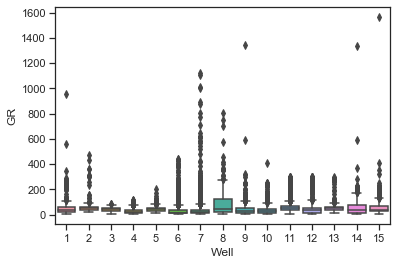

In [22]:
sns.set(style='ticks')
sns.boxplot(x=data_subset['Well'],y=data_subset['GR'])

It is seen that there are values greater than 200 GAPI in the gamma ray which is unusual in conventional reservoirs. Selecting the data for well 7 to plot GR against depth

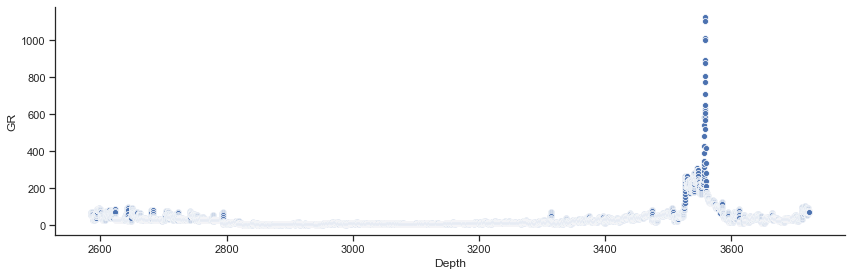

In [23]:
Well7_dataframe = data_subset[data_subset['Well']==7]

sns.relplot(x ='Depth', y = 'GR', height = 4, aspect = 3, data = Well7_dataframe)

It is observed that the Gamma Ray (GR) vales are consistently within the limits of what is expected for GR values except at around depth 3575m, which shows a lithology effect

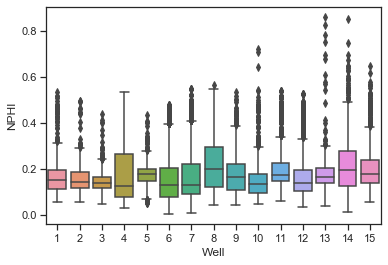

In [24]:
# Creating boxplots for NPHI and RHOB

sns.boxplot(x=data_subset['Well'],y=data_subset['NPHI'])


From this boxplots, it is observed that NPHI values above o.6 are outliers, which would be removed in subsequent sections

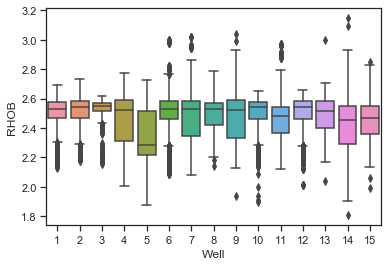

In [25]:
sns.boxplot(x=data_subset['Well'],y=data_subset['RHOB'])

       Well   Depth       GR    RHOB    NPHI  Facies
0         1  2922.5  13.4058  2.4838  0.1439       4
1         1  2923.0  15.2468  2.4837  0.1503       4
2         1  2923.5  11.2243  2.4823  0.1434       4
3         1  2924.0  11.7085  2.4479  0.1458       4
4         1  2924.5  16.3429  2.4836  0.1638       4
...     ...     ...      ...     ...     ...     ...
55940    15  4083.5  59.7060  2.4851  0.1416       2
55941    15  4084.0  58.4170  2.4860  0.1416       2
55942    15  4084.5  57.4990  2.5311  0.1527       2
55943    15  4085.0  56.7850  2.4731  0.1785       2
55944    15  4085.5  61.7220  2.4920  0.1566       2

[54658 rows x 6 columns]


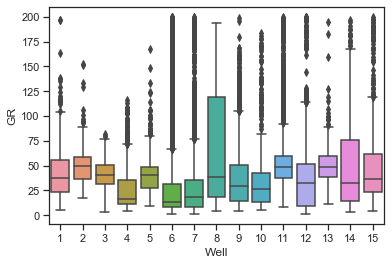

In [16]:
# Cleaning data, removing the outliers in the GR and NPHI values

clean_data = data_subset[(data_subset['GR']<200) & (data_subset['NPHI']<0.6)]

print (clean_data)
# creating boxplots to see the ccleaned data

sns.boxplot (x = clean_data['Well'], y = clean_data['GR'])


In [17]:
clean_data_subset = clean_data[['GR','RHOB','NPHI']]

print(clean_data_subset)

clean_data_subset.shape

            GR    RHOB    NPHI
0      13.4058  2.4838  0.1439
1      15.2468  2.4837  0.1503
2      11.2243  2.4823  0.1434
3      11.7085  2.4479  0.1458
4      16.3429  2.4836  0.1638
...        ...     ...     ...
55940  59.7060  2.4851  0.1416
55941  58.4170  2.4860  0.1416
55942  57.4990  2.5311  0.1527
55943  56.7850  2.4731  0.1785
55944  61.7220  2.4920  0.1566

[54658 rows x 3 columns]


(54658, 3)

In [18]:
#selecting the training dataset which is contained only in wells 13-15

clean_data_Well13_to_15 = clean_data[clean_data['Well']>12]

#clean_data_Well13_to_15 = clean_data_Well13_to_15['Facies'].astype(int)
#clean_data_Well13_to_15 =pd.DataFrame(data=clean_data_Well13_to_15, columns='Well','Depth','GR','RHOB','NPHI','Facies')
clean_data_Well13_to_15

,Well,Depth,GR,RHOB,NPHI,Facies
51877,13,4175.5,20.6032,2.6117,0.0770,2
51878,13,4176.0,21.4990,2.6131,0.0798,2
51879,13,4176.5,22.4472,2.6334,0.0801,2
51880,13,4177.0,29.6713,2.6328,0.1005,2
51881,13,4177.5,34.7014,2.6183,0.1001,2
...,...,...,...,...,...,...
55940,15,4083.5,59.7060,2.4851,0.1416,2
55941,15,4084.0,58.4170,2.4860,0.1416,2
55942,15,4084.5,57.4990,2.5311,0.1527,2
55943,15,4085.0,56.7850,2.4731,0.1785,2


In [19]:
from sklearn.model_selection import train_test_split

#random_state so the selected variables continue to remain the same upon run
#train , test = train_test_split(clean_data, test_size = 0.15, random_state = 12)


clean_data_Well13_to_15_new = clean_data_Well13_to_15.drop('Well', axis=1) # drop wells
clean_data_Well13_to_15_new = clean_data_Well13_to_15.drop('Depth', axis=1) # drop depth

print(clean_data_Well13_to_15)


train , test = train_test_split(clean_data_Well13_to_15_new, test_size = 0.15, random_state = 12, stratify = clean_data_Well13_to_15_new['Facies'])

x_train = train.drop('Facies', axis=1) # Drop Facies from the x-variables
y_train = train['Facies'] #Facies is the value being predicted, the y-variable

#print(x_train)
#print(y_train)

x_test = test.drop('Facies', axis = 1) # Do the same for the test set
y_test = test['Facies']

       Well   Depth       GR    RHOB    NPHI  Facies
51877    13  4175.5  20.6032  2.6117  0.0770       2
51878    13  4176.0  21.4990  2.6131  0.0798       2
51879    13  4176.5  22.4472  2.6334  0.0801       2
51880    13  4177.0  29.6713  2.6328  0.1005       2
51881    13  4177.5  34.7014  2.6183  0.1001       2
...     ...     ...      ...     ...     ...     ...
55940    15  4083.5  59.7060  2.4851  0.1416       2
55941    15  4084.0  58.4170  2.4860  0.1416       2
55942    15  4084.5  57.4990  2.5311  0.1527       2
55943    15  4085.0  56.7850  2.4731  0.1785       2
55944    15  4085.5  61.7220  2.4920  0.1566       2

[4011 rows x 6 columns]


Using min-max scaler to scale the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

print(x_train_scaled)
print(x_train)

print(x_test)

[[0.5        0.08179277 0.53332837 0.2283833 ]
 [1.         0.13830586 0.31914894 0.42055103]
 [0.5        0.11319842 0.34064871 0.26581182]
 ...
 [0.5        0.06957608 0.56457372 0.17362675]
 [0.5        0.19297202 0.44613897 0.81840236]
 [1.         0.08600485 0.56301146 0.15387281]]
        0         1         2         3
0     0.5  0.081793  0.533328  0.228383
1     1.0  0.138306  0.319149  0.420551
2     0.5  0.113198  0.340649  0.265812
3     1.0  0.074470  0.522244  0.225957
4     0.5  0.129728  0.208972  0.439092
...   ...       ...       ...       ...
3404  0.5  0.682333  0.447032  0.572518
3405  0.5  0.463278  0.554903  0.345867
3406  0.5  0.069576  0.564574  0.173627
3407  0.5  0.192972  0.446139  0.818402
3408  1.0  0.086005  0.563011  0.153873

[3409 rows x 4 columns]
       0         1         2         3
0    0.0  0.402938  0.409085  0.253171
1    1.0  0.286659  0.447083  0.199131
2    0.5  0.068725  0.175374  0.284275
3    0.0  0.227070  0.196566  0.385056
4    0.0  0.

###
Determining the optimal values of k

In [21]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

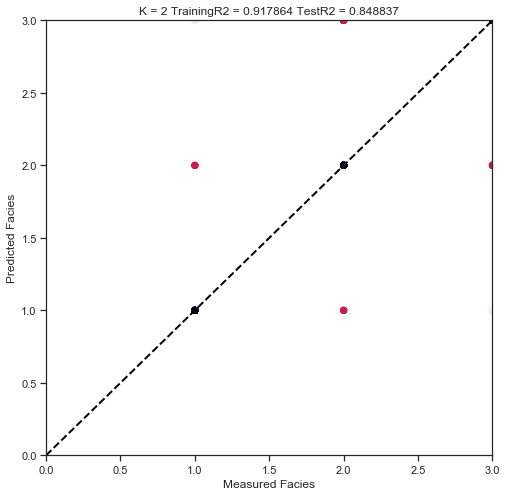

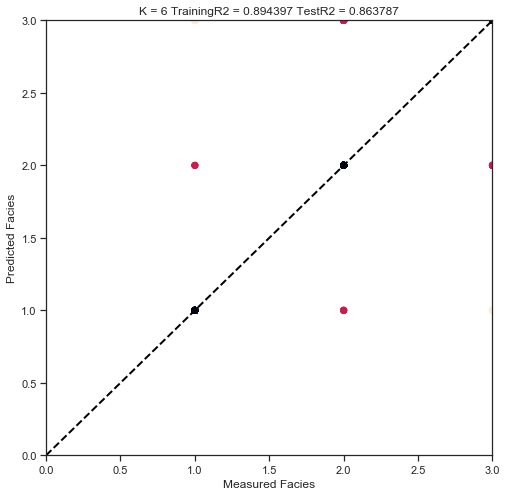

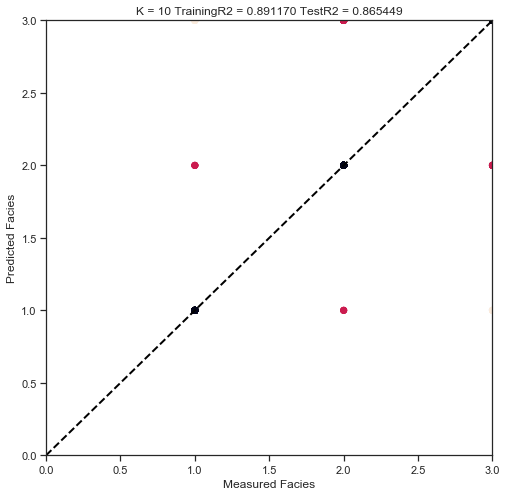

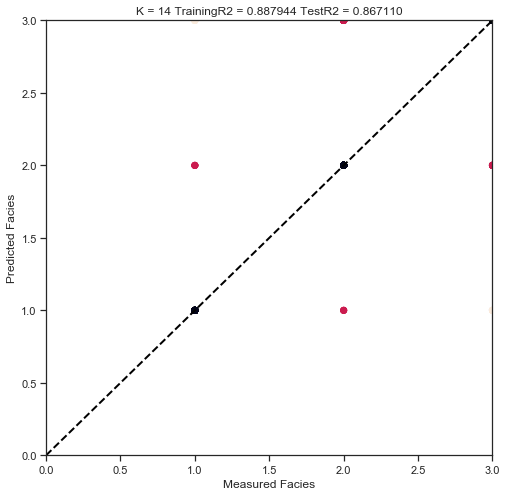

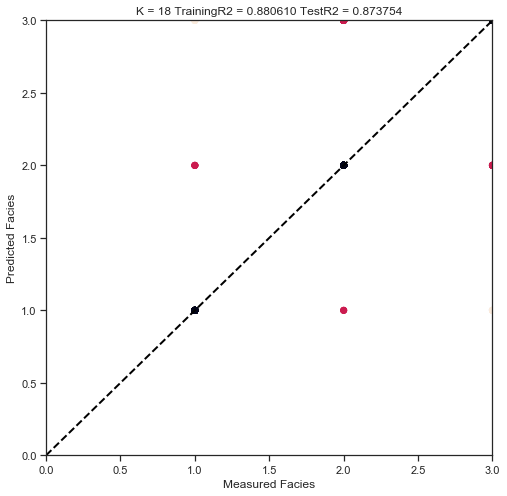

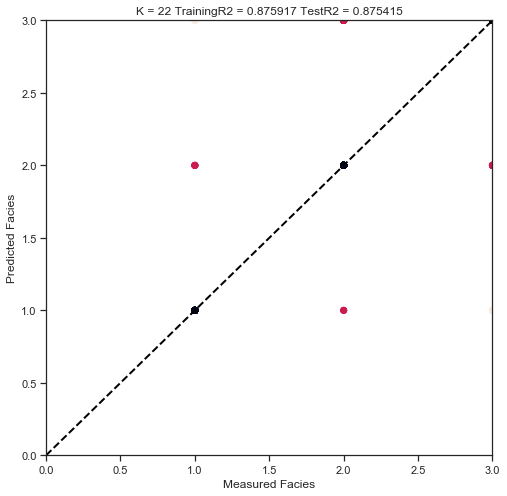

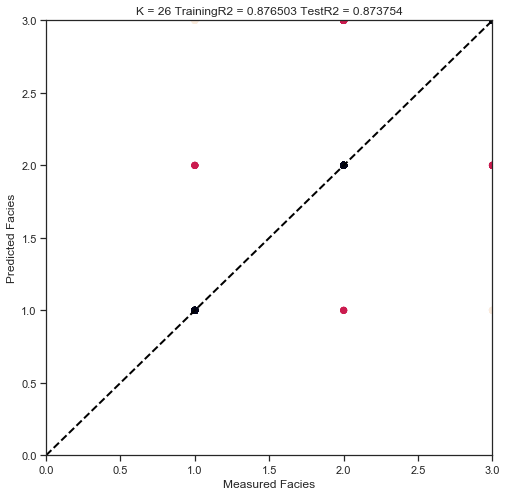

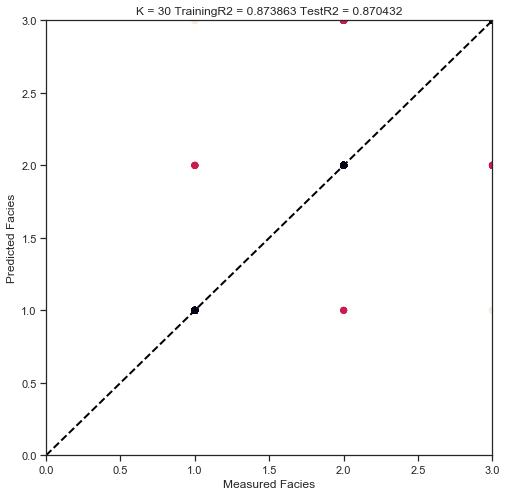

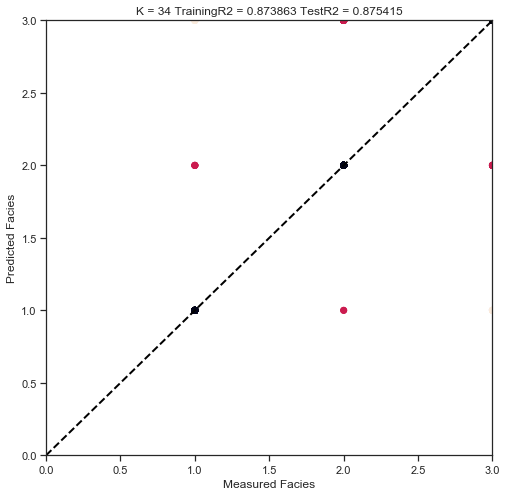

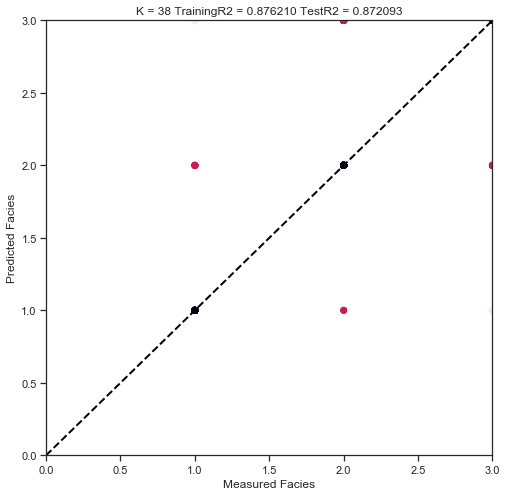

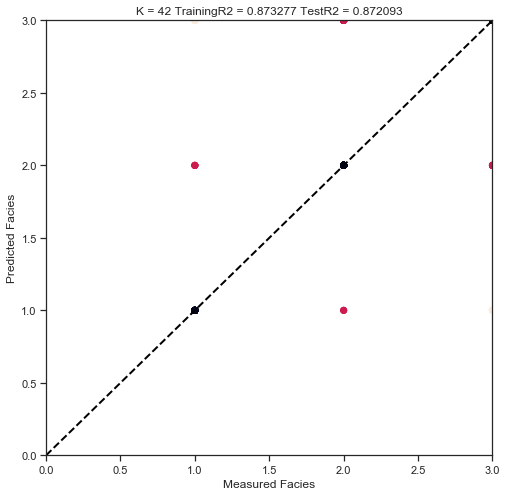

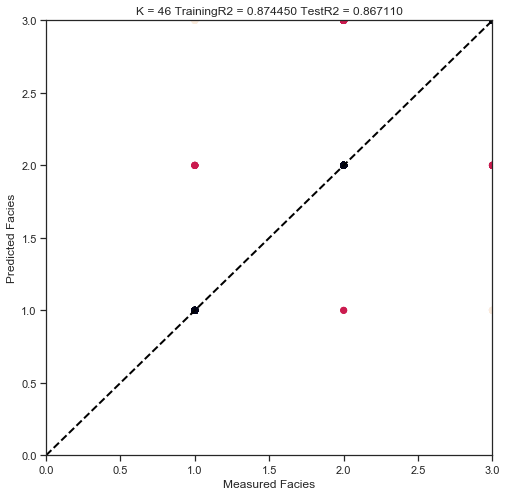

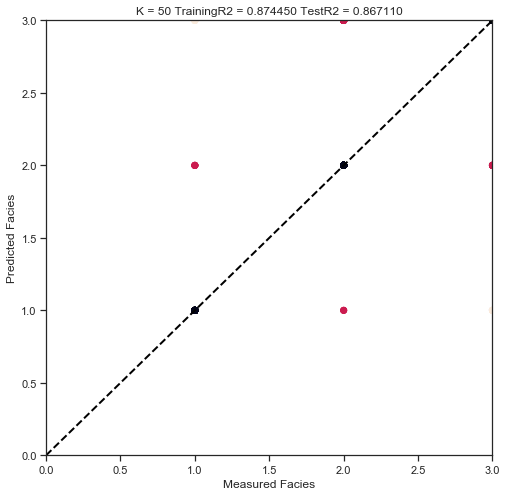

In [32]:
rmse_val = [] #to store rmse values for different k
k_val = []
for K in range(1, 50, 4):
    K = K + 1
    k_val.append(K)
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    model.fit(x_train, y_train)  # fit the model
    pred = model.predict(x_test) # make prediction on test set
    
    training_R2 = model.score(x_train, y_train)
    test_R2 = model.score(x_test, y_test)
    
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    er=abs(y_test - pred) 
   
# Also create a series of plots for predicted versus actual DT for different values of K
    fig = plt.figure(K, figsize=(8, 8))
    plt.axis([0, 3, 0, 3])
    plt.scatter(y_test, pred, c = er)
    plt.plot([0,3],[0,3],color='black',linewidth=2, linestyle='--')
    plt.ylabel('Predicted Facies') # Predicted values on y axis
    plt.xlabel('Measured Facies') 
    plt.title('K = %s TrainingR2 = %f TestR2 = %f'%(K, training_R2, test_R2))


In [22]:
WellLogs = clean_data_Well13_to_15[['GR','RHOB','NPHI']].to_numpy()
RockType = clean_data_Well13_to_15['Facies'].to_numpy()

#print(WellLogs)
#print(RockType)

from sklearn.preprocessing import MinMaxScaler
X = WellLogs
y = RockType
X = MinMaxScaler().fit_transform(X)

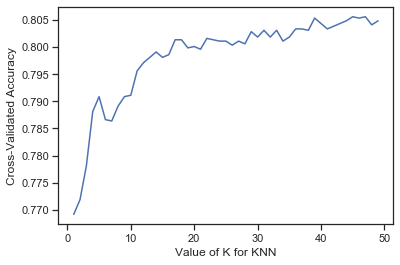

In [23]:
# Applying cross validation to the KNN algorithm, to generate optimum parameters
# choose k between 1 to 50

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score

k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    #scores = cross_val_score(knn, clean_data_Well13_to_15, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

From our cross-validation, it is seen that the optimum value of k which gives highest accuracy is k = 38. It is to be noted that k-fold cross validation, works on the original sample. The K-fold is compared with our RMSE values  in the chart above which computes the R2 value for both training and test data after splitting, and it is seen in the RMSE case that k value of 38 has the highest test R2 value.

In [24]:
# firstly the dataset has to be scaled.

clean_data_subset_scaled = scaler.fit_transform(clean_data_subset)

#print(clean_data_subset_scaled)

In [25]:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2)


knn = KNeighborsClassifier(38)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#y_score = knn.predict_proba(X_test)



In [26]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))


[[185   5   5]
 [  8 295  36]
 [  9  45 215]]
              precision    recall  f1-score   support

           1       0.92      0.95      0.93       195
           2       0.86      0.87      0.86       339
           3       0.84      0.80      0.82       269

    accuracy                           0.87       803
   macro avg       0.87      0.87      0.87       803
weighted avg       0.86      0.87      0.86       803



In [27]:
# now use the knn classifier to predict facies for the complete data
knn_pred = knn.predict(clean_data_subset_scaled)

clean_data['KNN_Pred_Facies'] = knn_pred

## SVM Supervised Learning

Hyperparameter Optimization using SVM, to select optimal values for C, gamma and kernel. To minimise the  run, a 5-fold validation is selected as opposed to a 10-fold validation

In [28]:
# Import the SVM library
from sklearn.svm import NuSVC
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 5, 10, 20, 50], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf','linear']} 


grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, verbose=3)  # estimator

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
print("Score on test set: %f" % grid.score(X_test, y_test))
print("Best parameters: %s" % grid.best_params_)

In [ ]:
# display results from cross validation

cv_results = pd.DataFrame(grid.cv_results_)
cv_results_tiny = cv_results[['param_C', 'mean_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(5)

In [29]:
#using linear as kernel value, gamma does not need to be specified 

classifier = SVC(C = 50, kernel = 'rbf', gamma = 10, random_state = 12)
classifier.fit(X_train, y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix  

y_svm_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_svm_pred)) 
print(classification_report(y_test,y_svm_pred))
#print(accuracy_score(y_test, y_pred))

[[183   8   4]
 [  6 300  33]
 [  6  47 216]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       195
           2       0.85      0.88      0.86       339
           3       0.85      0.80      0.83       269

    accuracy                           0.87       803
   macro avg       0.88      0.88      0.88       803
weighted avg       0.87      0.87      0.87       803



Pre-optimised confusion matrix:


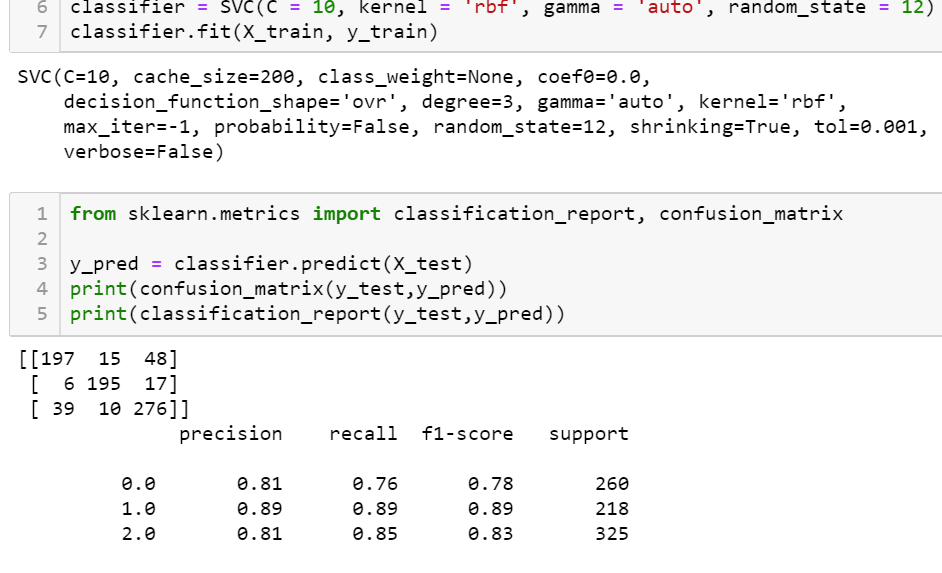

Post-optimised confusion matrix:


From what we can see from the confusion matrix, the SVC classifier is doing a good job. Let's create a matrix scatterplot colored by both the predicted and true facies.

           GR      RHOB      NPHI
0    0.394892  0.556390  0.268611
1    0.624145  0.417274  0.563636
2    0.286032  0.531171  0.294168
3    0.050280  0.345187  0.277187
4    0.293022  0.461613  0.328130
..        ...       ...       ...
798  0.197239  0.326440  0.394854
799  0.139840  0.256956  0.423499
800  0.235223  0.340277  0.457290
801  0.140263  0.602440  0.227959
802  0.310459  0.442642  0.353345

[803 rows x 3 columns]
[1 1 1 3 2 1 3 1 2 3 3 2 3 2 2 3 1 2 3 3 3 1 2 2 3 3 1 1 3 3 2 3 2 2 2 2 2
 3 3 2 3 1 2 1 2 2 1 1 2 1 2 3 3 2 3 2 2 3 1 2 2 3 2 1 3 2 2 2 3 1 2 2 2 2
 1 3 1 3 2 3 2 1 1 3 3 2 1 2 2 1 3 1 2 1 3 2 1 2 2 1 1 2 1 3 1 2 1 2 1 2 1
 2 3 3 2 2 2 2 1 2 3 3 2 3 1 1 2 3 1 1 3 3 3 2 2 1 2 1 1 3 3 2 1 2 3 2 3 1
 2 1 3 2 1 3 2 3 3 2 3 3 1 2 3 3 2 2 1 1 3 2 2 3 1 2 3 2 1 3 3 2 3 2 2 1 3
 1 1 1 2 2 2 1 3 3 2 1 2 1 2 3 3 3 3 1 1 2 2 2 3 2 3 2 3 3 3 2 1 3 2 3 3 3
 2 3 1 3 3 3 1 2 1 1 1 3 2 3 3 1 3 3 2 3 3 1 2 2 2 2 2 3 2 2 2 2 1 2 3 3 3
 3 2 2 1 2 2 2 1 2 2 3 3 1 3 1 3 2 2 3 1 2 

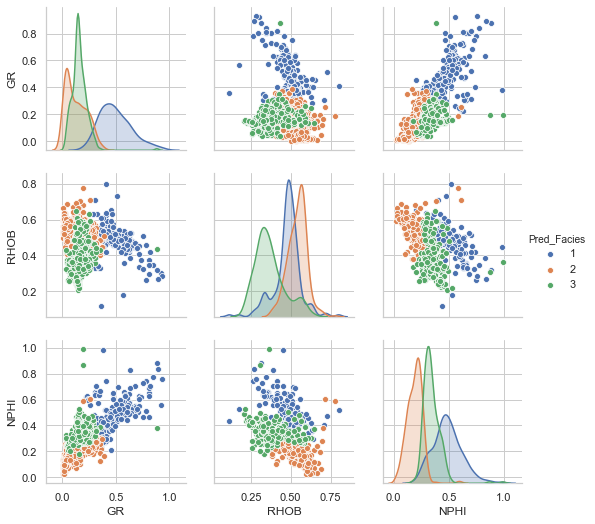

In [93]:
dataframe_test = pd.DataFrame(data = X_test, columns = ['GR','RHOB','NPHI'] )
print(dataframe_test)
#print(y_pred)
dataframe_test['Pred_Facies'] = y_svm_pred
dataframe_test['True_Facies'] = y_test

#print(dataframe_test)

sns.pairplot(dataframe_test, vars = ['GR','RHOB','NPHI'], hue = 'Pred_Facies')

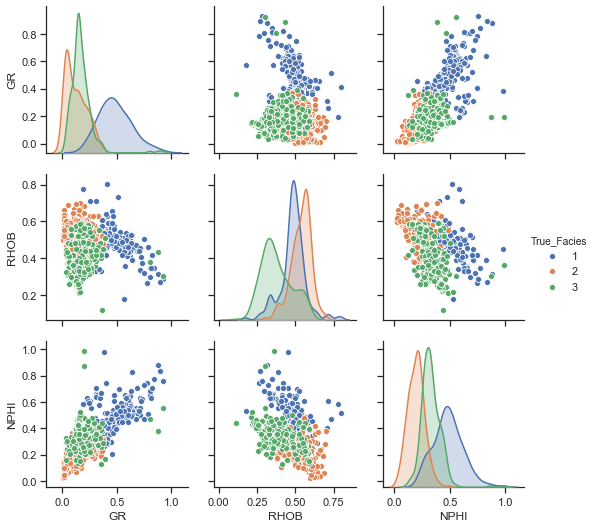

In [32]:
sns.pairplot(dataframe_test, vars = ['GR','RHOB','NPHI'], hue = 'True_Facies')

Applying the support vector machine (SVM) classifier to predict the facies for the complete dataset (Wells 1-15).

In [33]:
svm_model_pred = classifier.predict(clean_data_subset_scaled)

In [34]:
clean_data['SVM_Pred_Facies'] = svm_model_pred
clean_data


,Well,Depth,GR,RHOB,NPHI,Facies,KNN_Pred_Facies,SVM_Pred_Facies
0,1,2922.5,13.4058,2.4838,0.1439,4,2,2
1,1,2923.0,15.2468,2.4837,0.1503,4,2,2
2,1,2923.5,11.2243,2.4823,0.1434,4,2,2
3,1,2924.0,11.7085,2.4479,0.1458,4,2,2
4,1,2924.5,16.3429,2.4836,0.1638,4,2,2
...,...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,2.4851,0.1416,2,2,2
55941,15,4084.0,58.4170,2.4860,0.1416,2,2,2
55942,15,4084.5,57.4990,2.5311,0.1527,2,2,2
55943,15,4085.0,56.7850,2.4731,0.1785,2,2,2


## Lets run a random forest classifier and seee how it performs.

In [35]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(12)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [37]:
print(confusion_matrix(y_test,y_pred_rf)) 
print(classification_report(y_test,y_pred_rf))

[[181   7   7]
 [ 15 289  35]
 [ 10  39 220]]
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       195
           2       0.86      0.85      0.86       339
           3       0.84      0.82      0.83       269

    accuracy                           0.86       803
   macro avg       0.86      0.87      0.86       803
weighted avg       0.86      0.86      0.86       803



In [38]:
# To perform hyper-parameter tuning for random forest
# Look at parameters used by our current forest

print('Parameters currently in use:\n')
print(rnd_clf.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 16, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In performing hyper parameter tuning, we can decide to run a Random Hyperparameter Grid or a K-fold cross validation.

In this case we decide to run a random hyperparemeter grid to have an idea of the parameters to use for k-fold validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rnd_clf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rnd_clf_random = RandomizedSearchCV(estimator = rnd_clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rnd_clf_random.fit(X_train, y_train)

### Parameter optimization for Random Forest (RF) using K - fold optimization

In [39]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 500, 1000]
}
# Create a based model
rnd_clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rnd_clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)


In [52]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  5.6min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 200}

In [40]:
# using the hyper-tune parameters

rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, max_depth = 10, max_features =2, min_samples_leaf = 4, min_samples_split = 12, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [41]:
print(confusion_matrix(y_test,y_pred_rf)) 
print(classification_report(y_test,y_pred_rf))
#print(accuracy_score(y_test, y_pred))

[[181   6   8]
 [ 15 290  34]
 [ 14  39 216]]
              precision    recall  f1-score   support

           1       0.86      0.93      0.89       195
           2       0.87      0.86      0.86       339
           3       0.84      0.80      0.82       269

    accuracy                           0.86       803
   macro avg       0.85      0.86      0.86       803
weighted avg       0.86      0.86      0.85       803



In [42]:
rnd_clf_model_pred = rnd_clf.predict(clean_data_subset_scaled)

In [43]:
clean_data['RF_Pred_Facies'] = rnd_clf_model_pred

In [44]:
clean_data

,Well,Depth,GR,RHOB,NPHI,Facies,KNN_Pred_Facies,SVM_Pred_Facies,RF_Pred_Facies
0,1,2922.5,13.4058,2.4838,0.1439,4,2,2,2
1,1,2923.0,15.2468,2.4837,0.1503,4,2,2,2
2,1,2923.5,11.2243,2.4823,0.1434,4,2,2,2
3,1,2924.0,11.7085,2.4479,0.1458,4,2,2,2
4,1,2924.5,16.3429,2.4836,0.1638,4,2,2,2
...,...,...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,2.4851,0.1416,2,2,2,2
55941,15,4084.0,58.4170,2.4860,0.1416,2,2,2,2
55942,15,4084.5,57.4990,2.5311,0.1527,2,2,2,2
55943,15,4085.0,56.7850,2.4731,0.1785,2,2,2,3


In [45]:
clean_data.shape

(54658, 9)

In [46]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [47]:
clean_data ['Facies']=clean_data ['Facies'].apply(np.int64)
clean_data ['SVM_Pred_Facies']=clean_data ['SVM_Pred_Facies'].apply(np.int64)
#print(clean_data)

In [48]:
clean_data['Well'] = clean_data['Well'].astype('category')
#clean_data['Facies'] = clean_data['Facies'].astype('category')
clean_data['Facies'] = clean_data['Facies'].astype(int)
clean_data['Well'].unique()
clean_data['Facies'].unique()

array([4, 2, 3, 1], dtype=int64)

In [49]:
clean_data = clean_data[['Facies','Depth','GR','RHOB','NPHI','Well','SVM_Pred_Facies','KNN_Pred_Facies','RF_Pred_Facies']]
clean_data

,Facies,Depth,GR,RHOB,NPHI,Well,SVM_Pred_Facies,KNN_Pred_Facies,RF_Pred_Facies
0,4,2922.5,13.4058,2.4838,0.1439,1,2,2,2
1,4,2923.0,15.2468,2.4837,0.1503,1,2,2,2
2,4,2923.5,11.2243,2.4823,0.1434,1,2,2,2
3,4,2924.0,11.7085,2.4479,0.1458,1,2,2,2
4,4,2924.5,16.3429,2.4836,0.1638,1,2,2,2
...,...,...,...,...,...,...,...,...,...
55940,2,4083.5,59.7060,2.4851,0.1416,15,2,2,2
55941,2,4084.0,58.4170,2.4860,0.1416,15,2,2,2
55942,2,4084.5,57.4990,2.5311,0.1527,15,2,2,2
55943,2,4085.0,56.7850,2.4731,0.1785,15,2,2,3


In [50]:
facies_colors = ['#F4D03F','#2E86C1', '#196F3D','#F5B041']
facies_labels = ['Q', 'Sh', 'Carb','Na']

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]


def label_facies(row, labels):
    return labels[ row['Facies'] -1 ]
   


clean_data.loc[:,'FaciesLabels'] = clean_data.apply(lambda row: label_facies(row, facies_labels), axis = 1)
clean_data.describe()

,Facies,Depth,GR,RHOB,NPHI,SVM_Pred_Facies,KNN_Pred_Facies,RF_Pred_Facies
count,54658.000000,54658.000000,54658.000000,54658.000000,54658.000000,54658.000000,54658.000000,54658.000000
mean,3.860039,3375.198114,34.646472,2.481150,0.159333,2.071005,2.084818,2.100534
std,0.537714,516.209728,33.833525,0.139026,0.086445,0.609273,0.617466,0.623801
min,1.000000,2552.000000,0.837900,1.805100,0.002000,1.000000,1.000000,1.000000
25%,4.000000,2995.425000,9.972100,2.429000,0.094300,2.000000,2.000000,2.000000
50%,4.000000,3296.550000,26.109200,2.527000,0.140000,2.000000,2.000000,2.000000
75%,4.000000,3634.500000,46.764450,2.580000,0.206000,2.000000,2.000000,2.000000
max,4.000000,5301.500000,199.981700,3.149300,0.596500,3.000000,3.000000,3.000000


In [51]:
clean_data

,Facies,Depth,GR,RHOB,NPHI,Well,SVM_Pred_Facies,KNN_Pred_Facies,RF_Pred_Facies,FaciesLabels
0,4,2922.5,13.4058,2.4838,0.1439,1,2,2,2,Na
1,4,2923.0,15.2468,2.4837,0.1503,1,2,2,2,Na
2,4,2923.5,11.2243,2.4823,0.1434,1,2,2,2,Na
3,4,2924.0,11.7085,2.4479,0.1458,1,2,2,2,Na
4,4,2924.5,16.3429,2.4836,0.1638,1,2,2,2,Na
...,...,...,...,...,...,...,...,...,...,...
55940,2,4083.5,59.7060,2.4851,0.1416,15,2,2,2,Sh
55941,2,4084.0,58.4170,2.4860,0.1416,15,2,2,2,Sh
55942,2,4084.5,57.4990,2.5311,0.1527,15,2,2,2,Sh
55943,2,4085.0,56.7850,2.4731,0.1785,15,2,2,3,Sh


In [94]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster_svm_pred=np.repeat(np.expand_dims(logs['SVM_Pred_Facies'].values,1), 100, 1)
    cluster_knn_pred=np.repeat(np.expand_dims(logs['KNN_Pred_Facies'].values,1), 100, 1)
    cluster_rf_pred=np.repeat(np.expand_dims(logs['RF_Pred_Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(25, 20))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RHOB, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[3].imshow(cluster_svm_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[4].imshow(cluster_knn_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[5].imshow(cluster_rf_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    im=ax[6].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="40%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    
    cbar.set_label((14*'').join(facies_labels))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-4):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RHOB")
    ax[1].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel('SVM_Pred_Facies')
    ax[4].set_xlabel('KNN_Pred_Facies')
    ax[5].set_xlabel('RF_Pred_Facies')
    ax[6].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[3].set_xticklabels([])
    ax[4].set_xticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    
    f.suptitle('Well: %s'%logs.iloc[0]['Well'], fontsize=14,y=0.94)

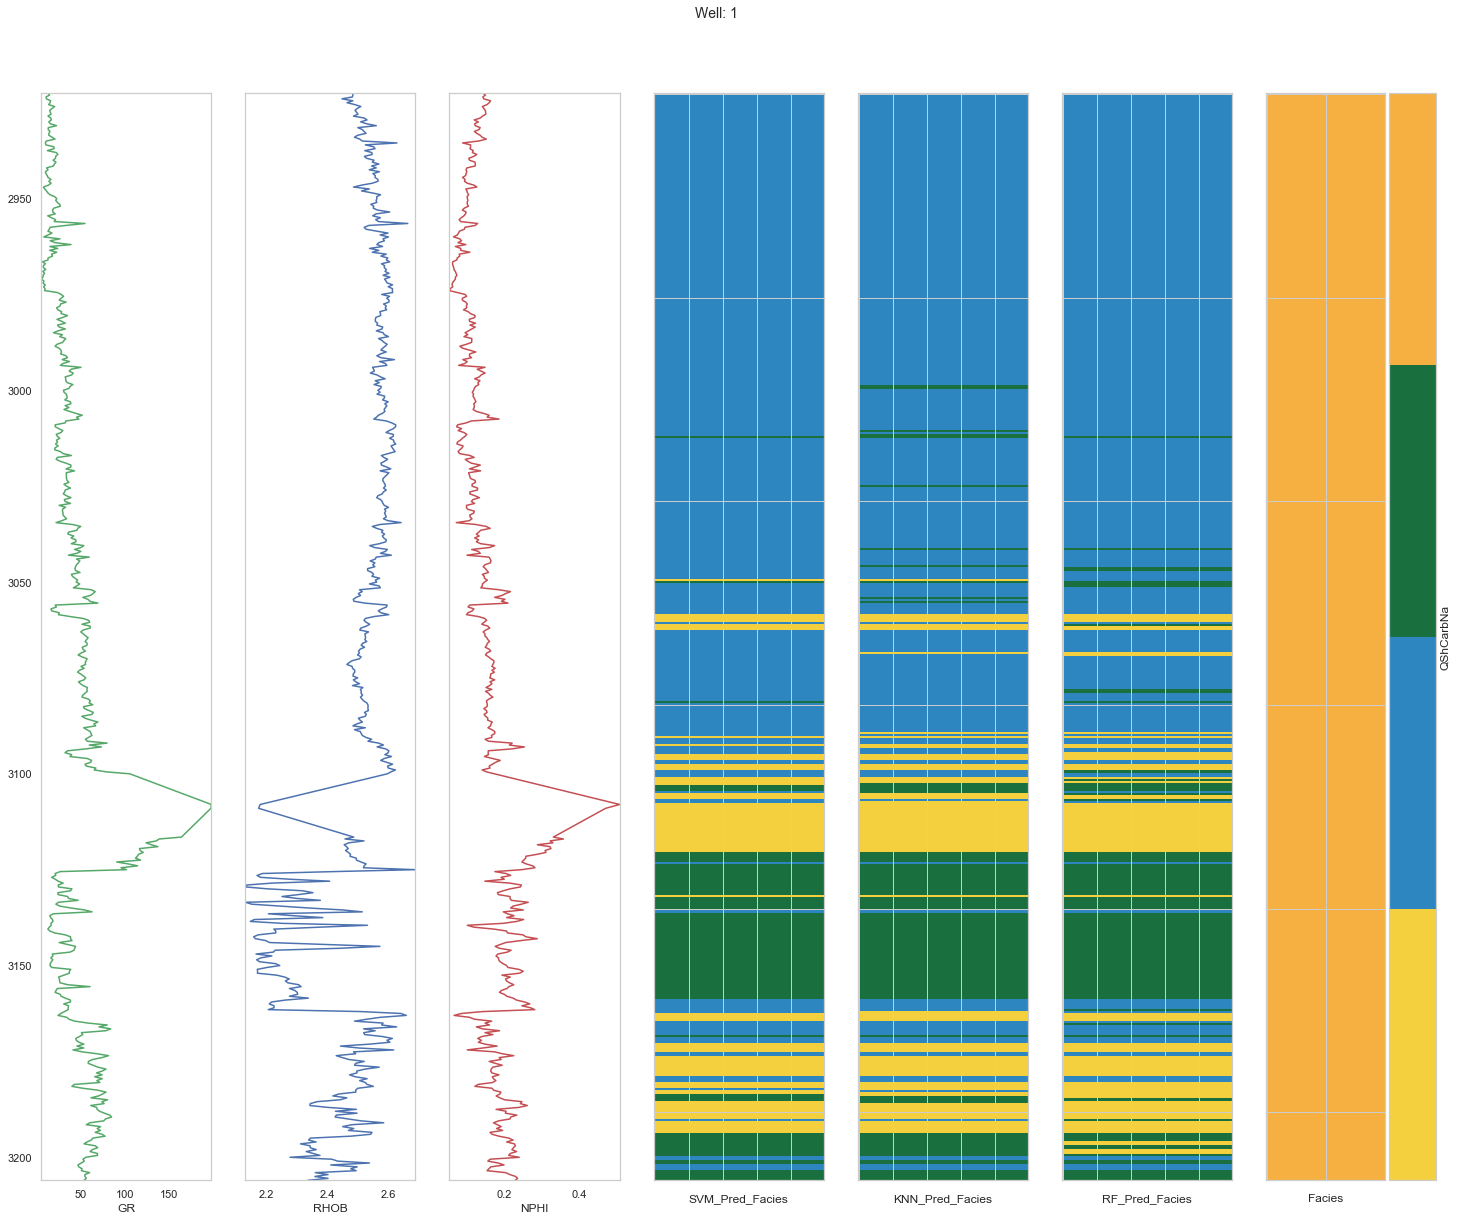

In [95]:
make_facies_log_plot(clean_data[clean_data['Well'] == 1], facies_colors)


#make_facies_log_plot(clean_data[clean_data['Well'] == 13], facies_colors)

#make_facies_log_plot(clean_data_subset, facies_colors)

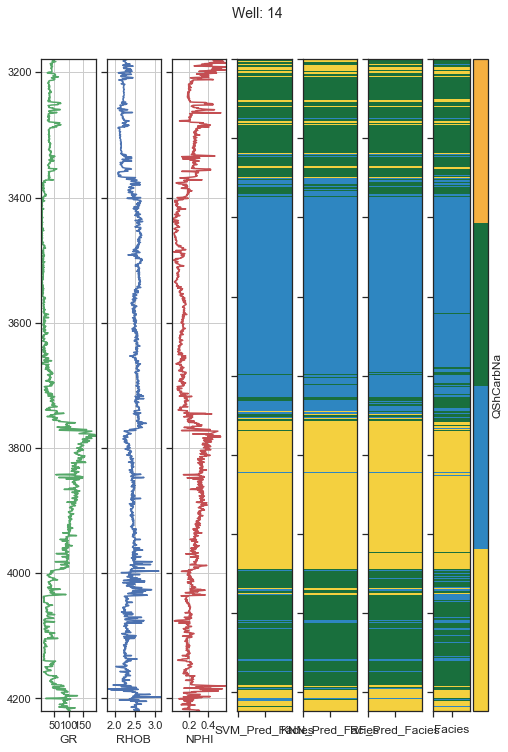

In [54]:
# Showing the output of well 14

make_facies_log_plot(clean_data[clean_data['Well'] == 14], facies_colors)


## Adding Gaussian Noise to the Dataset and Evaluating the Performance for Supervised Learning Techniques

For this case, noise is added to the predictors - input variables (WellLogs) to see how they effect the output variable - response (facies). 

It is important to note that while adding noise to the data, the data should not be scaled, because scaling before adding noise renders some elements in the array negative. Also, in varying the levels of noise the variable "standard deviation" is what is varied.

Noise is added to the predictors and the new data is split into training and test set, and the different supervised learning techniques are applied to the dataset. Their confusion matrix are computed, classification report and output for the complete dataset printed for the 3 cases.

In [55]:
Z = WellLogs
clean_signal = Z

def gauss_noise():
    mu, sigma = 0,0.1
    noise = np.random.normal(mu,sigma,[4011,3])
    signal = clean_signal + noise
    #now scale the signal
    scaler = MinMaxScaler(feature_range=(0, 1))
    signal = scaler.fit_transform(signal)
   
    print ('Here is the noisy data to apply supervised learning to')    
    print(signal)
    i = 0
    
    while sigma <=12:
        
        noisy_welllog = signal
        X_noisy = noisy_welllog
        y = RockType
        X_noisy_train, X_noisy_test, y_train, y_test = train_test_split(X_noisy, y, stratify=y, test_size = 0.2)

        classifier_noise = SVC(C = 50, kernel = 'rbf', gamma = 10, random_state = 12)
        classifier_noise.fit(X_noisy_train, y_train)

        y_pred = classifier_noise.predict(X_noisy_test)

        print(

            'Here is the SVM confusion matrix below')
        print(confusion_matrix(y_test,y_pred)) 

        print(classification_report(y_test,y_pred))

        svm_noise_model_pred = classifier_noise.predict(clean_data_subset_scaled)
        clean_data['SVM_Pred_Facies_noise{}'.format(i+1)] = svm_noise_model_pred
        
        
        #this part of the function adds noise to the RF classifier
        rnd_clf_noise = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16, max_depth = 90, max_features =2, min_samples_leaf = 4, min_samples_split = 8, random_state=42)
        rnd_clf_noise.fit(X_noisy_train, y_train)
        y_pred_rf = rnd_clf_noise.predict(X_noisy_test)
        
        print('Here is the RF confusion matrix below')
        print(confusion_matrix(y_test,y_pred_rf)) 

        print(classification_report(y_test,y_pred_rf))

        rf_noise_model_pred = rnd_clf_noise.predict(clean_data_subset_scaled)
        clean_data['RF_Pred_Facies_noise{}'.format(i+1)] = rf_noise_model_pred
        
        
        # this part of the function applies to add noise to the KNN classifier
        knn_noise = KNeighborsClassifier(30)
        knn_noise.fit(X_train, y_train)
        knn_pred = knn_noise.predict(X_noisy_test)

        print('Here is the KNN confusion matrix below')
        print(confusion_matrix(y_test,knn_pred)) 

        print(classification_report(y_test,knn_pred))

        knn_noise_model_pred = knn_noise.predict(clean_data_subset_scaled)
        clean_data['KNN_Pred_Facies_noise{}'.format(i+1)] = knn_noise_model_pred
     
        sigma += 5
        i+=1
    
    print(clean_data)
    
    return
    
    
    
    

In [56]:
gauss_noise()

Here is the noisy data to apply supervised learning to
[[0.08640054 0.55080091 0.37672539]
 [0.08987167 0.64894482 0.20364088]
 [0.09559588 0.60352565 0.27594966]
 ...
 [0.27370698 0.42463419 0.4925957 ]
 [0.27104625 0.57682384 0.43011986]
 [0.29648592 0.48585981 0.42718893]]
Here is the SVM confusion matrix below
[[170  16   9]
 [  9 284  46]
 [ 12  91 166]]
              precision    recall  f1-score   support

           1       0.89      0.87      0.88       195
           2       0.73      0.84      0.78       339
           3       0.75      0.62      0.68       269

    accuracy                           0.77       803
   macro avg       0.79      0.78      0.78       803
weighted avg       0.77      0.77      0.77       803

Here is the RF confusion matrix below
[[173  11  11]
 [ 14 287  38]
 [  9  93 167]]
              precision    recall  f1-score   support

           1       0.88      0.89      0.88       195
           2       0.73      0.85      0.79       339
          

Making plots to compare actual facies, SVM predictions and SVM noise predictions with 3 levels. From the  results it is seen that extra level of noise actual leads to some levels of misclassification, but these little classification can be neglected as irrespective of the levels of noise, the prediction is almost comparable as seen with the accuracy score. 

Hence, it appears that levels of noise have negligble effect on SVM classification

In [63]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster_svm_pred=np.repeat(np.expand_dims(logs['SVM_Pred_Facies'].values,1), 100, 1)
    cluster_svm_n1_pred=np.repeat(np.expand_dims(logs['SVM_Pred_Facies_noise1'].values,1), 100, 1)
    cluster_svm_n2_pred=np.repeat(np.expand_dims(logs['SVM_Pred_Facies_noise2'].values,1), 100, 1)
    cluster_svm_n3_pred=np.repeat(np.expand_dims(logs['SVM_Pred_Facies_noise3'].values,1), 100, 1)
    
    
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(25, 20))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RHOB, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[3].imshow(cluster_svm_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[4].imshow(cluster_svm_n1_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[5].imshow(cluster_svm_n2_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[6].imshow(cluster_svm_n3_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="40%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    
    cbar.set_label((14*'').join(facies_labels))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-5):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RHOB")
    ax[1].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel('SVM_Pred_Facies')
    ax[4].set_xlabel('SVM_Pred_Facies_noise1')
    ax[5].set_xlabel('SVM_Pred_Facies_noise2')
    ax[6].set_xlabel('SVM_Pred_Facies_noise3')
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]); ax[7].set_yticklabels([])
    ax[3].set_xticklabels([])
    ax[4].set_xticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    
    f.suptitle('Well: %s'%logs.iloc[0]['Well'], fontsize=14,y=0.94)

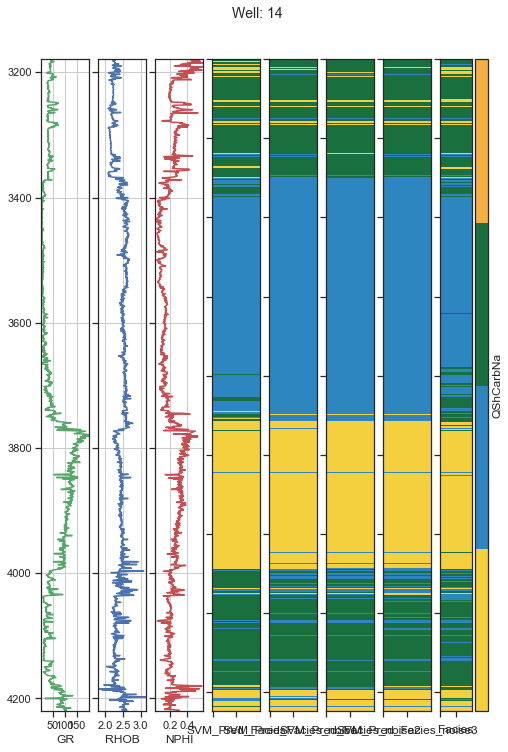

In [65]:
make_facies_log_plot(clean_data[clean_data['Well'] == 14], facies_colors)

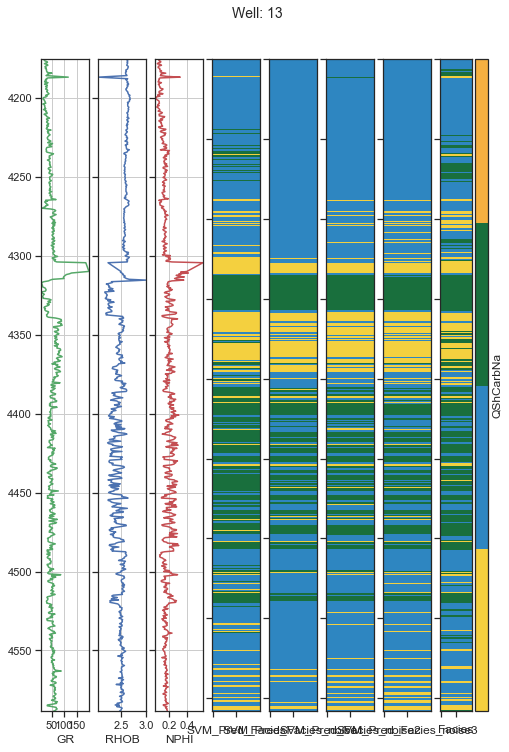

In [66]:
make_facies_log_plot(clean_data[clean_data['Well'] == 13], facies_colors)

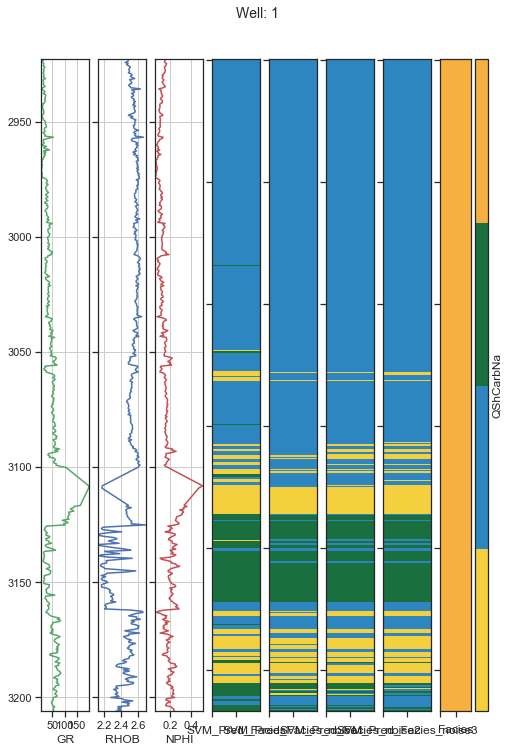

In [67]:
make_facies_log_plot(clean_data[clean_data['Well'] == 1], facies_colors)

Making plots to compare actual facies, RF predictions and RF noise predictions with 3 levels. The same noticeable differences in SVM is also observed here. In general, RF still gives good predictions with the presence of noise.

In [71]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster_rf_pred=np.repeat(np.expand_dims(logs['RF_Pred_Facies'].values,1), 100, 1)
    cluster_rf_n1_pred=np.repeat(np.expand_dims(logs['RF_Pred_Facies_noise1'].values,1), 100, 1)
    cluster_rf_n2_pred=np.repeat(np.expand_dims(logs['RF_Pred_Facies_noise2'].values,1), 100, 1)
    cluster_rf_n3_pred=np.repeat(np.expand_dims(logs['RF_Pred_Facies_noise3'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(25, 20))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RHOB, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[3].imshow(cluster_rf_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[4].imshow(cluster_rf_n1_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[5].imshow(cluster_rf_n2_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[6].imshow(cluster_rf_n3_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="40%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    
    cbar.set_label((14*'').join(facies_labels))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-5):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RHOB")
    ax[1].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel('RF_Pred_Facies')
    ax[4].set_xlabel('RF_Pred_Facies_noise1')
    ax[5].set_xlabel('RF_Pred_Facies_noise2')
    ax[6].set_xlabel('RF_Pred_Facies_noise3')
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]); ax[7].set_yticklabels([])
    ax[3].set_xticklabels([])
    ax[4].set_xticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    
    f.suptitle('Well: %s'%logs.iloc[0]['Well'], fontsize=14,y=0.94)

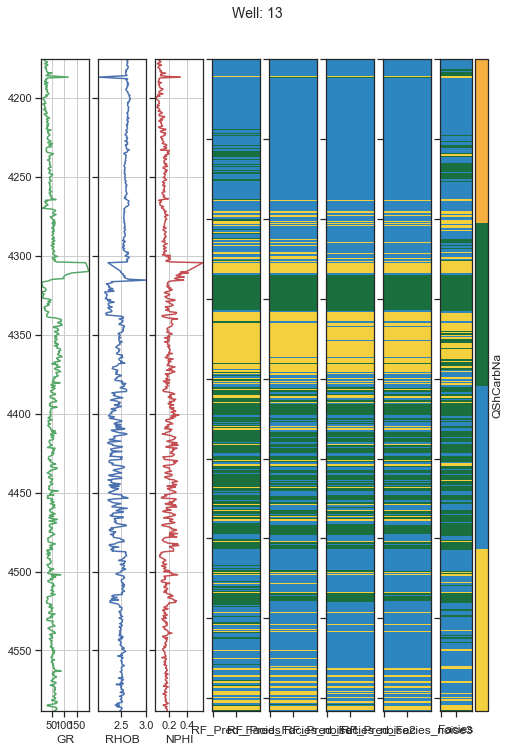

In [72]:
make_facies_log_plot(clean_data[clean_data['Well'] == 13], facies_colors)

Making plots to compare actual facies, KNN predictions and KNN noise predictions with 3 levels. KNN gives awful predictions. It is noticed that incorporating noise makes predictions worse, although for the last 2 levels of noise out of the actual 3 noise levels, it appears the impact of the level of noise has little or no effect on the already poor classification prediction.

In [89]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster_knn_pred=np.repeat(np.expand_dims(logs['KNN_Pred_Facies'].values,1), 100, 1)
    cluster_knn_n1_pred=np.repeat(np.expand_dims(logs['KNN_Pred_Facies_noise1'].values,1), 100, 1)
    cluster_knn_n2_pred=np.repeat(np.expand_dims(logs['KNN_Pred_Facies_noise2'].values,1), 100, 1)
    cluster_knn_n3_pred=np.repeat(np.expand_dims(logs['KNN_Pred_Facies_noise3'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(20,20))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RHOB, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[3].imshow(cluster_knn_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[4].imshow(cluster_knn_n1_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[5].imshow(cluster_knn_n2_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    ax[6].imshow(cluster_knn_n3_pred, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="40%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    
    cbar.set_label((14*'').join(facies_labels))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-5):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RHOB")
    ax[1].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel('KNN_Pred_Facies')
    ax[4].set_xlabel('KNN_Pred_Facies_noise1')
    ax[5].set_xlabel('KNN_Pred_Facies_noise2')
    ax[6].set_xlabel('KNN_Pred_Facies_noise3')
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]); ax[7].set_yticklabels([])
    ax[3].set_xticklabels([])
    ax[4].set_xticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    
    f.suptitle('Well: %s'%logs.iloc[0]['Well'], fontsize=14,y=0.94)
    f.savefig('plot.png')

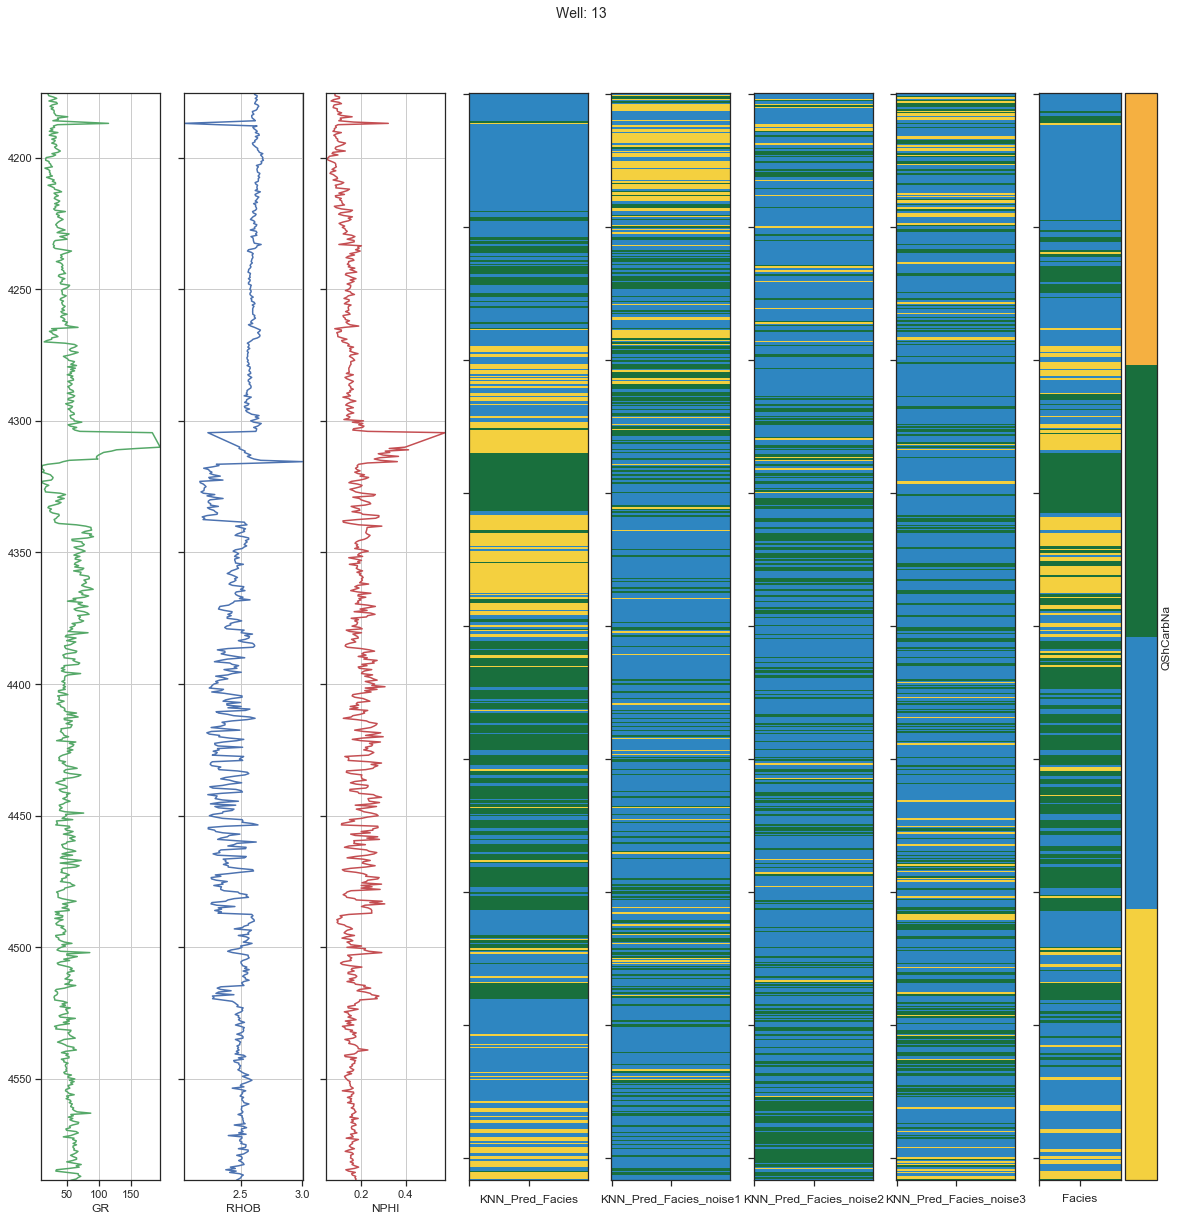

In [90]:
make_facies_log_plot(clean_data[clean_data['Well'] == 13], facies_colors)



In [83]:
clean_data_13 = clean_data[clean_data['Well'] == 13]
clean_data_13

,Facies,Depth,GR,RHOB,NPHI,Well,SVM_Pred_Facies,KNN_Pred_Facies,RF_Pred_Facies,FaciesLabels,SVM_Pred_Facies_noise1,RF_Pred_Facies_noise1,KNN_Pred_Facies_noise1,SVM_Pred_Facies_noise2,RF_Pred_Facies_noise2,KNN_Pred_Facies_noise2,SVM_Pred_Facies_noise3,RF_Pred_Facies_noise3,KNN_Pred_Facies_noise3
51877,2,4175.5,20.6032,2.6117,0.0770,13,2,2,2,Sh,2,2,3,2,2,3,2,2,3
51878,2,4176.0,21.4990,2.6131,0.0798,13,2,2,2,Sh,2,2,3,2,2,3,2,2,2
51879,2,4176.5,22.4472,2.6334,0.0801,13,2,2,2,Sh,2,2,1,2,2,1,2,2,2
51880,2,4177.0,29.6713,2.6328,0.1005,13,2,2,2,Sh,2,2,2,2,2,2,2,2,1
51881,2,4177.5,34.7014,2.6183,0.1001,13,2,2,2,Sh,2,2,2,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,1,4586.5,68.1668,2.5219,0.1587,13,1,1,1,Q,1,1,2,1,1,1,1,1,2
52700,1,4587.0,71.9559,2.5062,0.1739,13,1,1,1,Q,1,1,1,1,1,3,1,1,3
52701,1,4587.5,67.5752,2.5030,0.1704,13,1,1,1,Q,1,1,2,1,1,3,1,1,2
52702,1,4588.0,65.0492,2.4855,0.1754,13,1,1,1,Q,1,1,2,1,1,3,2,1,2
